# ObsID : 0945040133, SRCNUM : 11, Instru : EPN
Not on Simbad.

## ESASky

https://sky.esa.int/esasky/?target=54.38275000000001%20-28.289333333333335&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033731.8-281722
- IAU name : 4XMM J033731.8-281721
- RA : 03h 37m 31.839s
- DEC : -28° 17' 22.01"

In [2]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945040133_SRCNUM11_EPN_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.409e-03 +/- 9.121e-04 (100.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-79
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.011e+04 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945040133_SRCNUM11_EPN_background_spectrum.fits
  Background Exposure Time: 1.011e+04 sec
 Using Response (RMF) File            ObsID0945040133_SRCNUM11_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945040133_SRCNUM11_EPN.arf



In [4]:
n_cts = 8.409e-03*1.011e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 85.01499

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [10]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot("data")
spec.ignore("**-0.2 12.0-**")

     6 channels (1-6) ignored in spectrum #     1
     2 channels (78-79) ignored in spectrum #     1



(-0.5, 859.5, 657.5, -0.5)

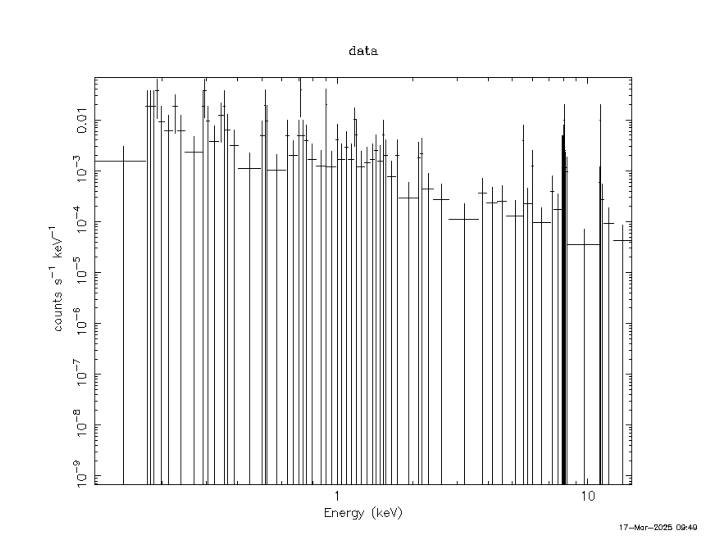

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [11]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              1.063046e+07     using 71 bins.

Te

(-0.5, 856.5, 660.5, -0.5)

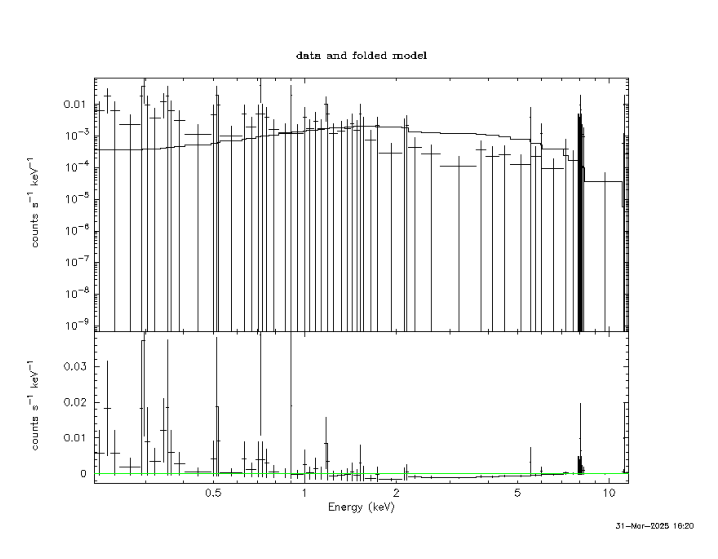

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [12]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.127800e+06     using 71 bins.

Test statistic : Chi-Squared              7.177057e+10     using 71 bins.
 Null hypothesis probability of 0.000000e+00 with 68 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
566836       397279       -3      0.372123       198.275      0.286731
329633       339601       -1      0.138404       199.107      0.127534
201950       441407       -1     0.0161799       199.286     0.0595446


(-0.5, 855.5, 652.5, -0.5)

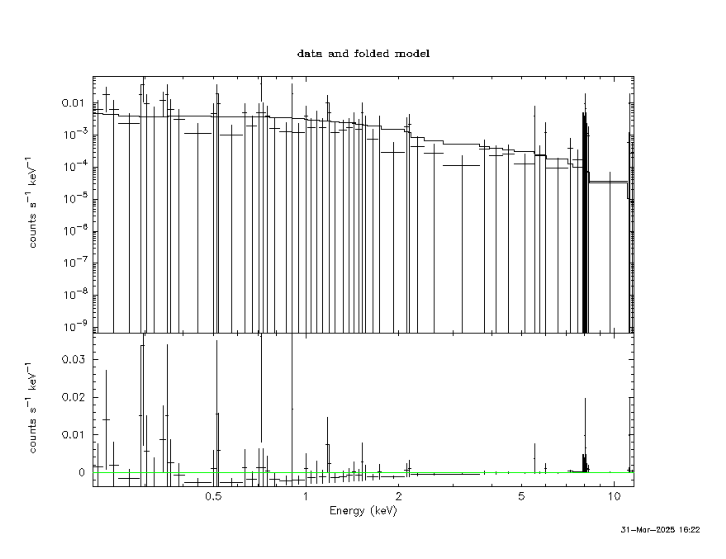

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                833196.7     using 71 bins.

Test statistic : Chi-Squared              1.015494e+10     using 71 bins.
 Null hypothesis probability of 0.000000e+00 with 68 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
79296.1      251977       -3      0.446726       62.0684     

(-0.5, 856.5, 661.5, -0.5)

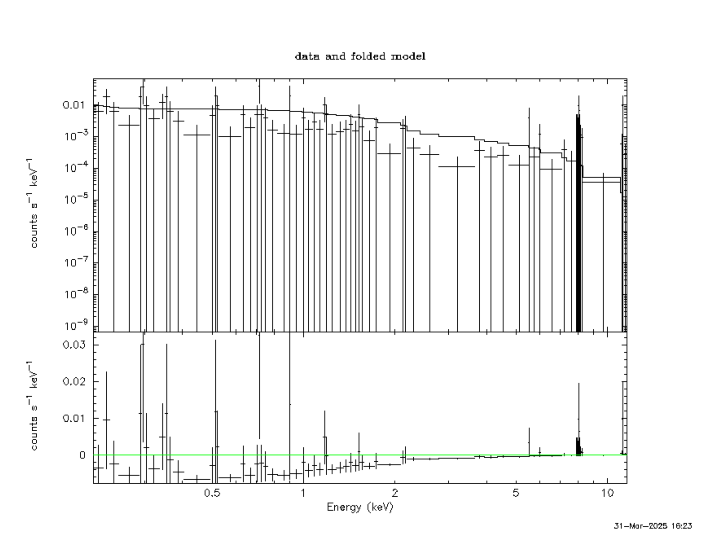

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model (Second best fit)

In [14]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              5.507275e+06     using 71 bins.

Test statistic : Chi-Squared              4.720086e+11     using 71 bins.
 Null hypothesis probability of 0.000000e+00 with 68 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
987519       1.45129e+06   0      0.337657       6.46921      0.162761
12182.6      1.54349e+06  -1       794.512      -2.48426     0.0754571
1579.61      24728.1      -2       209.597       7.97798     0.036173

(-0.5, 855.5, 659.5, -0.5)

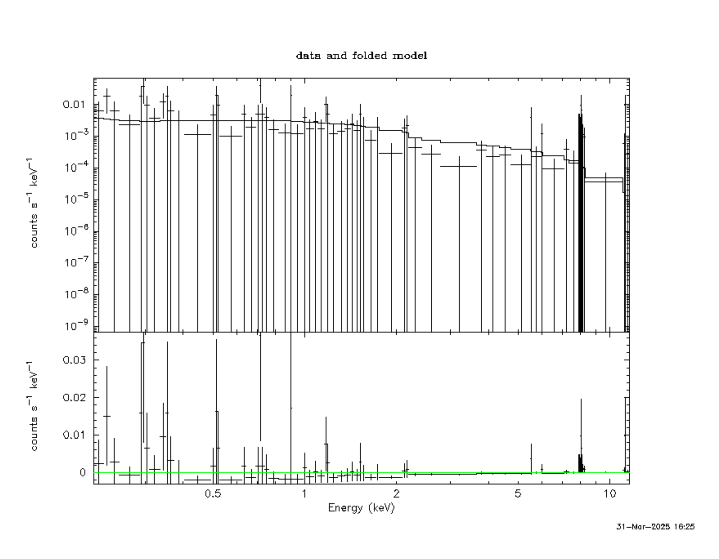

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model (Best fit)

In [16]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              7.636308e+06     using 71 bins.

Test statistic : Chi-Squared              8.924358e+11     using 71 bins.
 Null hypothesis probability of 0.000000e+00 with 66 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
4.7922e+06   924012 

(-0.5, 856.5, 661.5, -0.5)

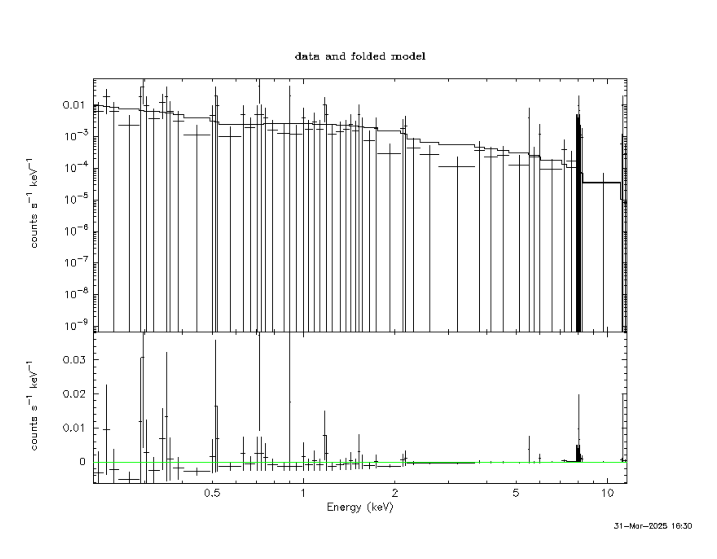

In [21]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremsspowerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 54.3826624°
- Dec: -28.2894459°

54.38 -28.29

**Column density :** nH = 2*10^20 cm^-2

In [17]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 29662.776252629268

bremss
(tbabs) : 46980372424.83492

apec
(tbabs) : 5499741721850.304

powerlaw (Second best fit)
(tbabs) : 60830.55438626671

bremss+powerlaw (Best fit)
(tbabs) : 9.371002156637703e+20


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Bremss + Powerlaw`` with C-statistic = 125.4815 using 6 bins: **1.937e-13 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Powerlaw`` with C-statistic = 127.0887 using 6 bins: **2.3629e-13 ergs/cm^2/s**.

In [3]:
Flux_bp = 1.9378e-13 # ergs/cm^2/s
Flux_pow = 2.3629e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")

X-ray flux : 
Bremss + Powerlaw : F_x-ray = 1.9378e-13 ergs/cm^2/s
Powerlaw : F_x-ray = 2.3629e-13 ergs/cm^2/s


### Optical flux
No magnitude value from GAIA is available, so we use GAIA's limiting magnitude of G = 20.7.

In [6]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical flux (lower limit) : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux (lower limit) : F_optical = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [7]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung + Powerlaw : F_x-ray/F_optical = {Flux_bp/F}")
print(f"Powerlaw : F_x-ray/F_optical = {Flux_pow/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung + Powerlaw : F_x-ray/F_optical = 3.5165731231134996
Powerlaw : F_x-ray/F_optical = 4.288012505214619


## Luminosity
No distance or parallax data is available on ESASky.

In [4]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bp = 4*np.pi*Flux_bp*(d1_cm)**2 # erg/s
L2_bp = 4*np.pi*Flux_bp*(d2_cm)**2 # erg/s
L1_pow = 4*np.pi*Flux_pow*(d1_cm)**2 # erg/s
L2_pow = 4*np.pi*Flux_pow*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of a galactic source with d = [1 pc - 30 kpc] :"+color.END)
print(f"Bremss + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")
print(f"Powerlaw : L_x-ray = [{L1_pow}, {L2_pow}] erg/s")
print()

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1_bp = 4*np.pi*Flux_bp*(d1_cm)**2 # erg/s
L2_bp = 4*np.pi*Flux_bp*(d2_cm)**2 # erg/s
L1_pow = 4*np.pi*Flux_pow*(d1_cm)**2 # erg/s
L2_pow = 4*np.pi*Flux_pow*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :"+color.END)
print(f"Bremss + Powerlaw : L_x-ray = [{L1_bp}, {L2_bp}] erg/s")
print(f"Powerlaw : L_x-ray = [{L1_pow}, {L2_pow}] erg/s")

Luminosity of a galactic source with d = [1 pc - 30 kpc] :
Bremss + Powerlaw : L_x-ray = [2.3186020558681064e+25, 2.3186020558681057e+31] erg/s
Powerlaw : L_x-ray = [2.827239548875399e+25, 2.8272395488753985e+31] erg/s

Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :
Bremss + Powerlaw : L_x-ray = [2.3186020558681063e+37, 2.3186020558681062e+45] erg/s
Powerlaw : L_x-ray = [2.8272395488753993e+37, 2.8272395488753992e+45] erg/s


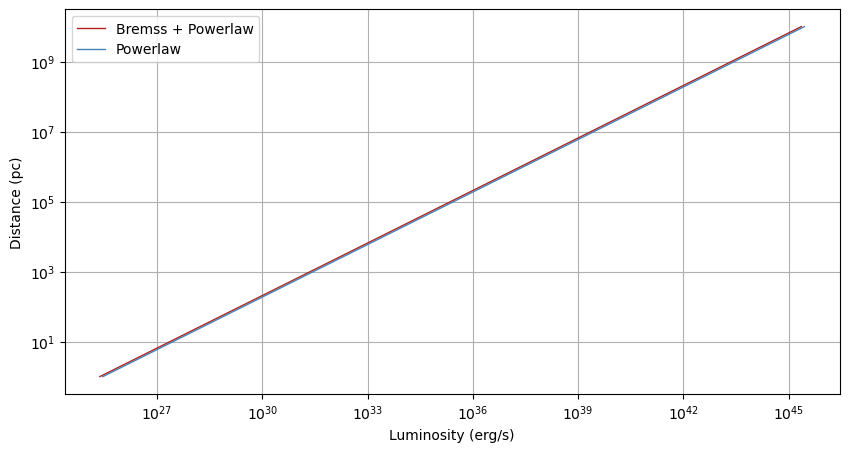

In [5]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s
L_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L_bp,D_pc, lw=1, color='firebrick', label="Bremss + Powerlaw")
plt.plot(L_pow,D_pc, lw=1, color='steelblue', label="Powerlaw")
plt.legend(loc='best')
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()